In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,tenure,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0.000000,0.115423,0.001275
1,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0.464789,0.385075,0.215867
2,2,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0.014085,0.354229,0.010310
3,3,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0.619718,0.239303,0.210241
4,4,1,0,0,0,1,1,1,1,0,...,0,0,0,0,1,0,0,0.014085,0.521891,0.015330


In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
x=df.drop('Churn',axis=1)
x.shape

(7032, 47)

In [5]:
y=df['Churn']
y.shape

(7032,)

In [6]:
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from keras import regularizers

In [7]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x, y,test_size=0.2, random_state=42)

In [9]:
from keras.models import Sequential, load_model
from keras import layers
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
nn = Sequential()
Input_Shape = xr_train.shape[1]
nn.add(layers.Dense(512, input_shape=(Input_Shape,), activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(512, activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.summary()

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

fit_nn = nn.fit(xr_train, yr_train, 
                epochs=100, 
                verbose=False, 
                validation_data=(xr_test, yr_test),
               batch_size=30, callbacks=[mc])

best_nn = load_model('best_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               24576     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 287,745
Trainable params: 287,745
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Plot model evaluation of best and final model after training
accuracy = best_nn.evaluate(xr_train, yr_train, verbose=False)
print("Best Model Training Score: {:.4f}".format(accuracy[0]))
print("Best Model Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = best_nn.evaluate(xr_test, yr_test, verbose=False)
print("Best Model Testing Score: {:.4f}".format(accuracy[0]))
print("Best Model Testing Accuracy: {:.4f}".format(accuracy[1]))
print("----------------------------------------")

accuracy = nn.evaluate(xr_train, yr_train, verbose=False)
print("Final Model Training Score: {:.4f}".format(accuracy[0]))
print("Final Model Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = nn.evaluate(xr_test, yr_test, verbose=False)
print("Final Model Testing Score: {:.4f}".format(accuracy[0]))
print("Final Model Testing Accuracy: {:.4f}".format(accuracy[1]))

Best Model Training Score: 0.3759
Best Model Training Accuracy: 0.8208
Best Model Testing Score: 0.4489
Best Model Testing Accuracy: 0.7946
----------------------------------------
Final Model Training Score: 0.1019
Final Model Training Accuracy: 0.9547
Final Model Testing Score: 1.4200
Final Model Testing Accuracy: 0.7356


In [13]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [14]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2, random_state=42)

In [15]:
nn = Sequential()
Input_Shape = xr_train.shape[1]
nn.add(layers.Dense(128, input_shape=(Input_Shape,), activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(128, activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.summary()

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

fit_nn = nn.fit(xr_train, yr_train, 
                epochs=32, 
                verbose=False, 
                validation_data=(xr_test, yr_test),
               batch_size=30, callbacks=[mc])

best_nn = load_model('best_model.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               6144      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22,785
Trainable params: 22,785
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Plot model evaluation of best and final model after training
accuracy = best_nn.evaluate(xr_train, yr_train, verbose=False)
print("Best Model Training Score: {:.4f}".format(accuracy[0]))
print("Best Model Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = best_nn.evaluate(xr_test, yr_test, verbose=False)
print("Best Model Testing Score: {:.4f}".format(accuracy[0]))
print("Best Model Testing Accuracy: {:.4f}".format(accuracy[1]))
print("----------------------------------------")

accuracy = nn.evaluate(xr_train, yr_train, verbose=False)
print("Final Model Training Score: {:.4f}".format(accuracy[0]))
print("Final Model Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = nn.evaluate(xr_test, yr_test, verbose=False)
print("Final Model Testing Score: {:.4f}".format(accuracy[0]))
print("Final Model Testing Accuracy: {:.4f}".format(accuracy[1]))

Best Model Training Score: 0.0300
Best Model Training Accuracy: 0.9902
Best Model Testing Score: 0.1459
Best Model Testing Accuracy: 0.9614
----------------------------------------
Final Model Training Score: 0.0255
Final Model Training Accuracy: 0.9920
Final Model Testing Score: 0.1670
Final Model Testing Accuracy: 0.9518


In [17]:
#Define function to show history of loss and accuracy during entire model training
def plot_history(fit_keras):
    acc = fit_keras.history['accuracy']
    val_acc = fit_keras.history['val_accuracy']
    loss = fit_keras.history['loss']
    val_loss = fit_keras.history['val_loss']
    x = range(1, len(acc)+1)
    
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Testing Accuracy')
    plt.title('Training &Testing Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Testing Loss')
    plt.title('Training &Testing Loss')
    plt.legend()

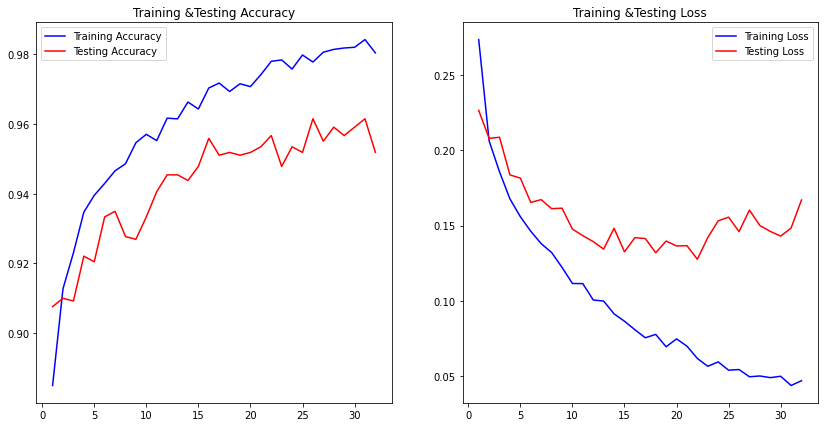

In [18]:
plot_history(fit_nn)

In [ ]:
filename="model_ann.h5"
best_nn.save(filename)